### **Importing Libraries**

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

## Exploratory Data Analysis (EDA)

## Diabetes Dataset

In [196]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **reading dataset**

In [197]:
#lets describe the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [198]:
#infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### **Taking Care of Missing Values**

In [199]:
#any null values
#not neccessary in above information we can see
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### **Taking Care of Duplicate Values**

In [200]:
df_dup = df.duplicated().any()
df_dup

False

In [201]:
print("Number of duplicate rows in original DataFrame:", df.duplicated().sum())

Number of duplicate rows in original DataFrame: 0


### **Histogram**

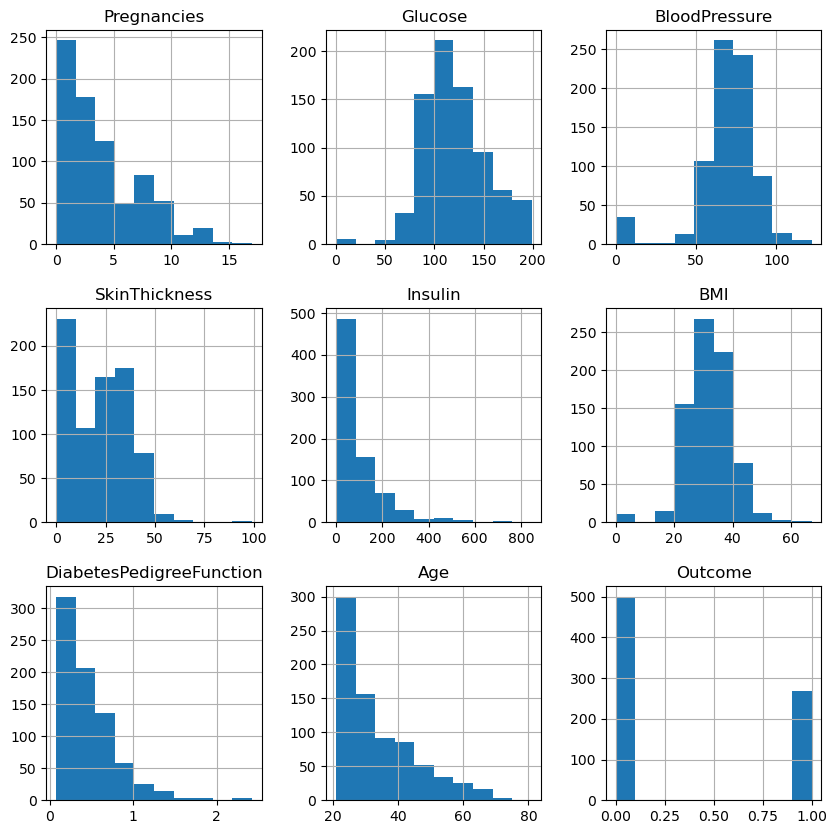

In [8]:
#histogram
df.hist(bins=10,figsize=(10,10))
plt.show()

### **coreleation matrix**

<Axes: >

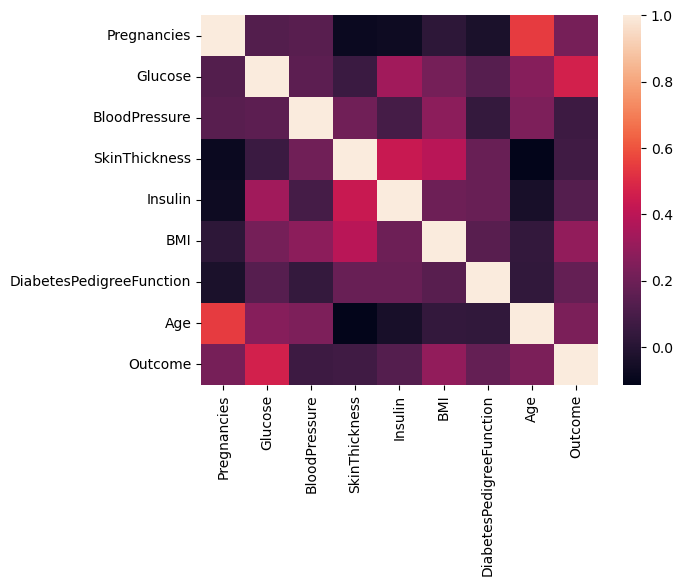

In [9]:
#correlation

sns.heatmap(df.corr())
# we can see skin thickness,insulin,pregnencies and age are full independent to each other
#age and pregencies has negative correlation

### **Outlier Detection and Removal**

<Axes: xlabel='count', ylabel='Outcome'>

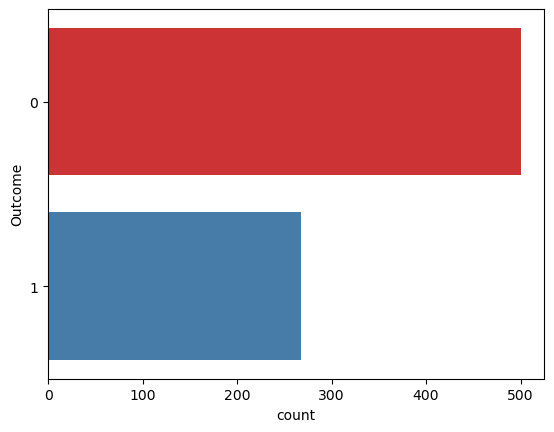

In [10]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['Outcome'],palette='Set1')

In [ ]:
sns.set(style="ticks")
sns.pairplot(df, hue="Outcome")

In [ ]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

In [202]:
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))


---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigr

In [203]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted

((768, 9), (639, 9))

C:\Users\aman0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


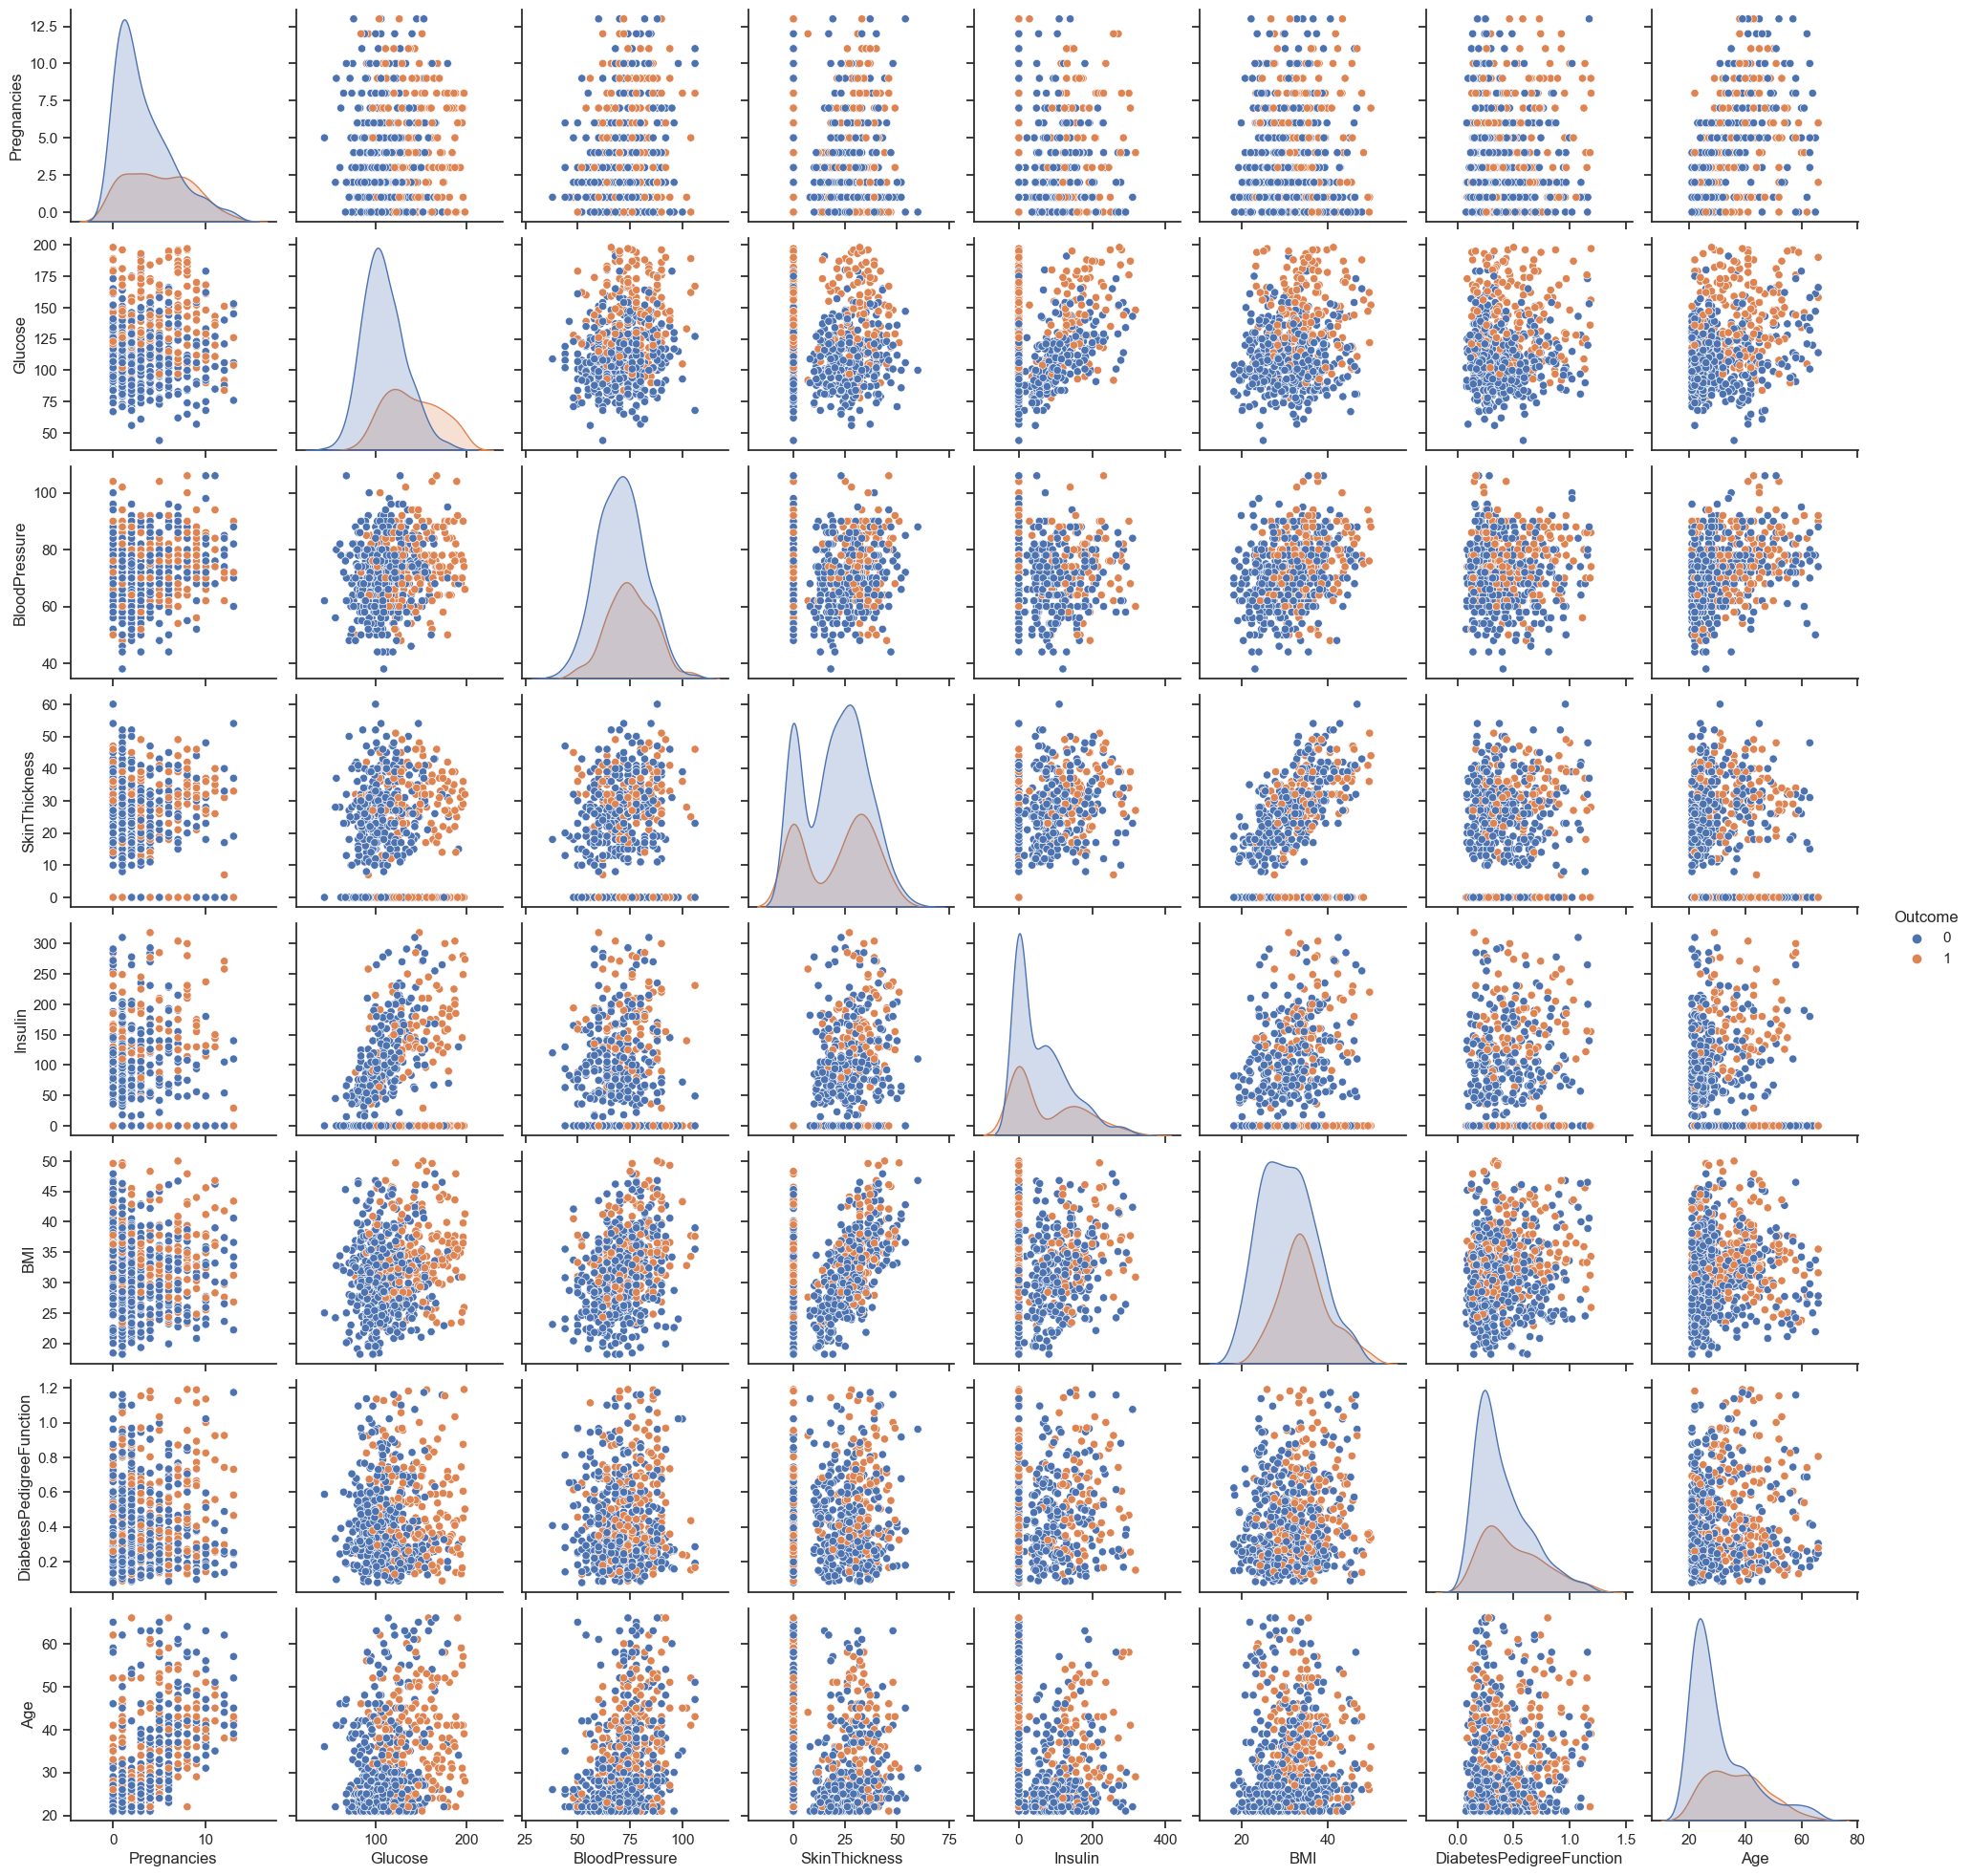

In [32]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

In [277]:
#lets extract features and targets
X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']

### **Train Test Split**

In [289]:
#Splitting train test data 80 20 ratio

train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [290]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((511, 8), (128, 8), (511,), (128,))

### **Training the Model**

### **Logistic regression**


In [245]:
#Logistic regession
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , ConfusionMatrixDisplay

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(train_X,train_y)


LogisticRegression(max_iter=1000)

In [246]:
#accuracy on training data
X_train_prediction = lr_model.predict(train_X)
lr_training_data_accuracy = accuracy_score(train_y, X_train_prediction)

In [247]:
# Accuracy on test data
X_test_prediction = lr_model.predict(test_X)
lr_test_data_accuracy = accuracy_score(test_y, X_test_prediction)


In [248]:
# Displaying Logistic Regression accuracies
print("Logistic Regression Accuracy:")
print("Training Accuracy:", lr_training_data_accuracy)
print("Test Accuracy:", lr_test_data_accuracy)

Logistic Regression Accuracy:
Training Accuracy: 0.7886497064579256
Test Accuracy: 0.8046875



Accuracy 0.8046875 ROC 0.7318713450292398


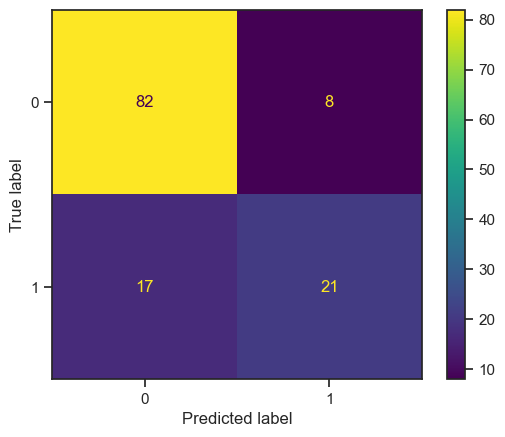

In [249]:
#Logistic Regression

acc=[]
roc=[]
y_pred=lr_model.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

# Generate predictions with the best model
pred_y = lr_model.predict(test_X)

# Create the confusion matrix
cm = confusion_matrix(test_y, pred_y)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


y_scores = lr_model.predict_proba(test_X)[:,1]  # Probabilities of positive class
fpr, tpr, _ = roc_curve(test_y, y_scores)
roc_auc = roc_auc_score(test_y, y_scores)

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr, tpr, color='Red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### **Support Vector Machine**

In [291]:
#SVM
from sklearn.svm import SVC
svm_model=SVC(kernel='linear')
svm_model.fit(train_X,train_y)

SVC(kernel='linear')

In [292]:
#accuracy on training data
X_train_prediction = svm_model.predict(train_X)
svm_training_data_accuracy = accuracy_score(train_y, X_train_prediction)

In [293]:
# Accuracy on test data
X_test_prediction = svm_model.predict(test_X)
svm_test_data_accuracy = accuracy_score(test_y, X_test_prediction)


In [294]:
# Displaying  SVM accuracies
print("SVM Accuracy:")
print("Training Accuracy:", svm_training_data_accuracy)
print("Test Accuracy:", svm_test_data_accuracy)

SVM Accuracy:
Training Accuracy: 0.7984344422700587
Test Accuracy: 0.7421875



Accuracy 0.78125 ROC 0.7275747508305648


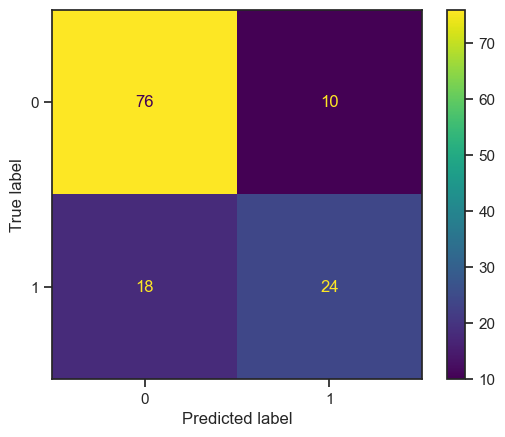

In [284]:
#Support Vector Machine
y_pred=svm_model.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

# Generate predictions with the best model
pred_y = svm_model.predict(test_X)

# Create the confusion matrix
cm = confusion_matrix(test_y, pred_y)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_scores_svm = svm_model.decision_function(test_X)  # Decision scores
fpr_svm, tpr_svm, _ = roc_curve(test_y, y_scores_svm)
roc_auc_svm = roc_auc_score(test_y, y_scores_svm)

plt.figure(figsize=(8, 6))  # Adjust width and height as needed
lw = 2
plt.plot(fpr_svm, tpr_svm, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()


### **Random Forest**

In [217]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initializing a Random Forest classifier model
rf_model = RandomForestClassifier(200)

# Training the Random Forest model on the training data
rf_model.fit(train_X, train_y)


RandomForestClassifier(n_estimators=200)

In [218]:
#accuracy on training data
X_train_prediction = rf_model.predict(train_X)
rf_training_data_accuracy = accuracy_score(train_y, X_train_prediction)

In [219]:
# Accuracy on test data
X_test_prediction = rf_model.predict(test_X)
rf_test_data_accuracy = accuracy_score(test_y, X_test_prediction)

In [220]:
# Displaying Random Forest accuracies
print("RF Accuracy:")
print("Training Accuracy:", rf_training_data_accuracy)
print("Test Accuracy:", rf_test_data_accuracy)

RF Accuracy:
Training Accuracy: 1.0
Test Accuracy: 0.7890625



Accuracy 0.8046875 ROC 0.7230414746543777


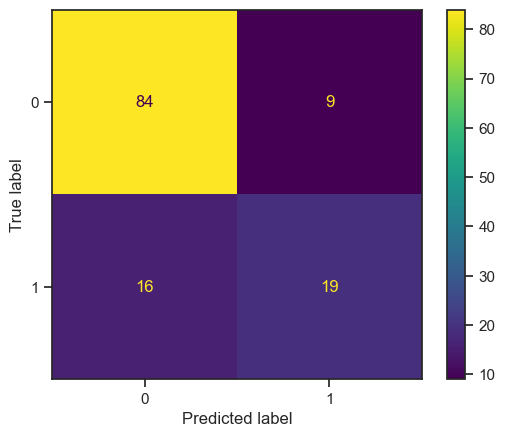

In [189]:
#Random forest
y_pred=rf_model.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

# Generate predictions with the best model
pred_y = rf_model.predict(test_X)

# Create the confusion matrix
cm = confusion_matrix(test_y, pred_y)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();
#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming rf_model is your trained Random Forest model
y_scores_rf = rf_model.predict_proba(test_X)[:, 1]  # Probability of positive class
fpr_rf, tpr_rf, _ = roc_curve(test_y, y_scores_rf)
roc_auc_rf = roc_auc_score(test_y, y_scores_rf)

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr_rf, tpr_rf, color='magenta',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()


### **Accuracy Graph**

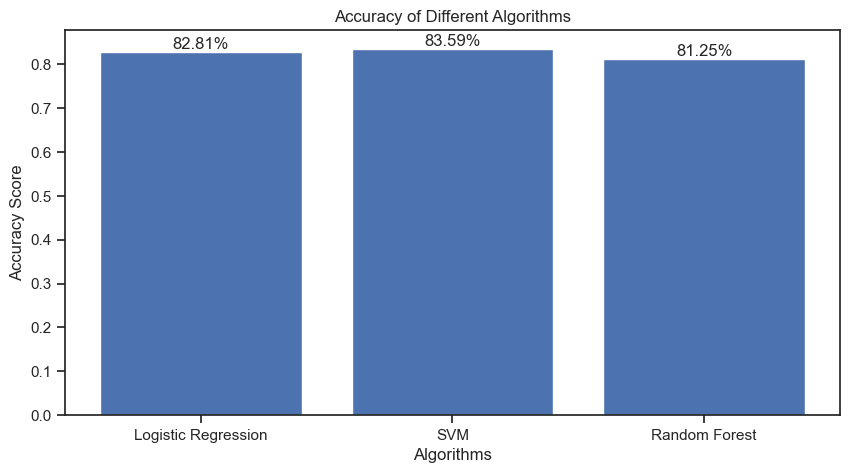

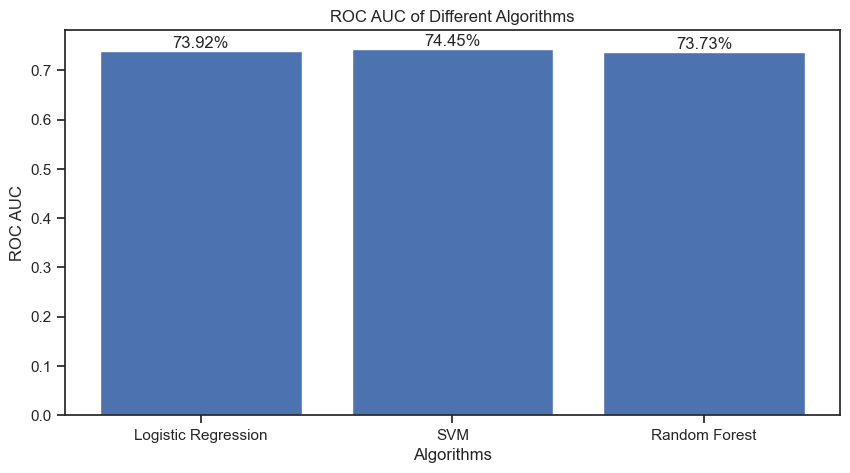

In [194]:
import matplotlib.pyplot as plt

# Data
algorithms = ['Logistic Regression', 'SVM', 'Random Forest']
accuracy_scores = acc[:3]
roc_auc_scores = roc[:3]

# Plotting accuracy scores
plt.figure(figsize=(10, 5))
bars_acc = plt.bar(algorithms, accuracy_scores, label='Accuracy')

# Adding percentage labels
for bar, acc_score in zip(bars_acc, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc_score:.2%}',
             ha='center', va='bottom')

plt.ylabel('Accuracy Score')
plt.xlabel('Algorithms')
plt.title('Accuracy of Different Algorithms')
plt.show()

# Plotting ROC AUC scores
plt.figure(figsize=(10, 5))
bars_roc = plt.bar(algorithms, roc_auc_scores, label='ROC AUC')

# Adding percentage labels
for bar, roc_auc_score in zip(bars_roc, roc_auc_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{roc_auc_score:.2%}',
             ha='center', va='bottom')

plt.ylabel('ROC AUC')
plt.xlabel('Algorithms')
plt.title('ROC AUC of Different Algorithms')
plt.show()


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')